<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения." data-toc-modified-id="Проверка-расчета-эффективности-обогащения.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения.</a></span></li><li><span><a href="#Анализ--недоступных-в-тестовой-выборке-признаков" data-toc-modified-id="Анализ--недоступных-в-тестовой-выборке-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ  недоступных в тестовой выборке признаков</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-изменения-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрации-веществ-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ на разных стадиях.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
def first_look(df):
    display(df.head())
    df.info()
    print('\nДубликатов:', sum(df.duplicated()))  

In [3]:
first_look(df_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
first_look(df_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
first_look(df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Дубликатов не обнаружено, но имеются пропуски.

date будем использовать как индекс, по ним будем соотносить наблюдения в разных таблицах.

In [6]:
df_full.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
full = df_full
train = df_train
test = df_test

In [7]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Проверка расчета эффективности обогащения.

In [8]:
def recovery(c, f, t):
    return ((c * (f - t)) / (f * (c - t))) * 100


In [9]:
df_recovery = recovery(df_train['rougher.output.concentrate_au'], 
                       df_train['rougher.input.feed_au'],
                       df_train['rougher.output.tail_au'])

In [10]:
mae = mean_absolute_error(df_train['rougher.output.recovery'],df_recovery)
mae

9.73512347450521e-15

Вычисленный нами результат MAE очень мал, а значит эффективность обогащения рассчитана правильно.

### Анализ  недоступных в тестовой выборке признаков

In [11]:
for i in df_train.columns.difference(df_test.columns):
    print(i)

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

В тестовой выборке отсутствуют данные по содержанию элементов как в концентрате, так и в отвальных хвостах на разных этапах очистки руды, а так же расчетные показатели на этапе флотации rougher.calculation.

### Предобработка данных.

Удалим столбцы в df_train, которых нет в df_test. Это нужно для обучения модели и дальнейшего тестирования на единых признаках. Пропуски же в данных заполним предидущими по времени значениями для каждого признака.

In [12]:
df_train = df_train[df_test.columns]
print(df_train.shape)
print(df_test.shape)

(14149, 52)
(5290, 52)


In [13]:
df_train = df_train.fillna(method="ffill")
df_test = df_test.fillna(method="ffill")
df_full = df_full.fillna(method="ffill")

###  Вывод
Провели предобработку данныхи выяснили:
- дубликатов не обнаружено
- заполнили пропуски признаков ближайшими по времени значениями
- показали, что эффективность обогащения рассчитана правильно
- удалили из обучающей выборки признаки, которых нет в тестовой (для обучения корректной модели)

## Анализ данных

### Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [14]:
au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
      'final.output.concentrate_au', 'золото']
ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
      'final.output.concentrate_ag', 'серебро']
pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
      'final.output.concentrate_pb', 'свинец']

steps = ['Флотация', 'Первый этап очистки', 'Второй этап очистки']

def show_concentrate(metal):
    plt.figure(figsize=(10,5))
    for i in range(len(steps)):
        ax = sns.distplot(df_full[metal[i]], label=steps[i])
        plt.legend()
    ax.set_title(metal[3])
    plt.show()

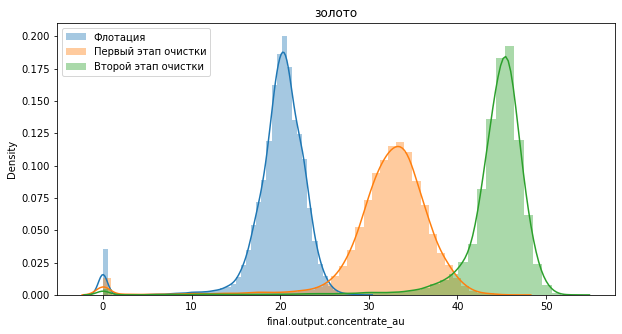

In [15]:
show_concentrate(au)

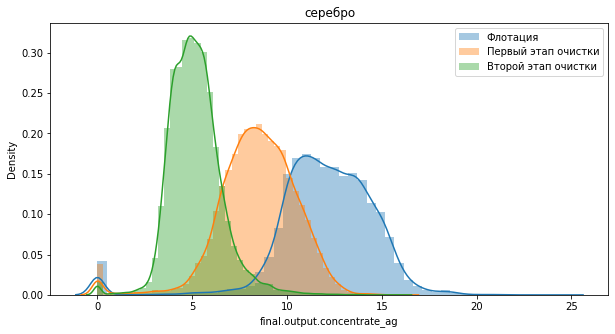

In [16]:
show_concentrate(ag)

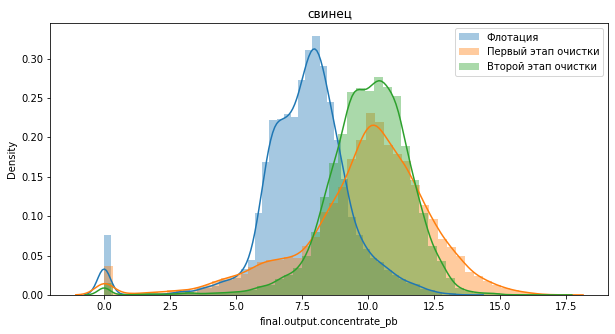

In [17]:
show_concentrate(pb)

На каждом технологическом этапе концентрация золота увеличивается, а серебра уменьшается. Концентрация свинца увеличивается после флотации и не сильно меняеся на этапах очистки.

### Сравнение распределения размеров гранул сырья 

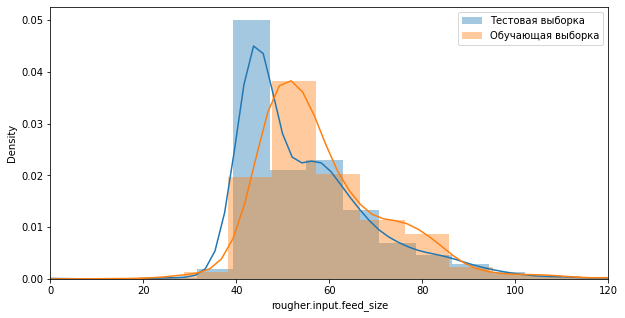

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df_test['rougher.input.feed_size'], label='Тестовая выборка')
sns.distplot(df_train['rougher.input.feed_size'], label='Обучающая выборка')
plt.xlim(0, 120)
plt.legend()
plt.show()

Из графика видно, что распределения размеров гранул сырья не сильно отличаются друг от друга.

 ### Исследование суммарной концентрации веществ на разных стадиях.

In [19]:
first = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + \
            df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol']
second = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + \
            df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
third = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + \
            df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol']


def show_sum_concentrate(step, title):
    plt.figure(figsize=(10,5))
    ax = sns.distplot(step)
    ax.set_title(title)
    plt.show()

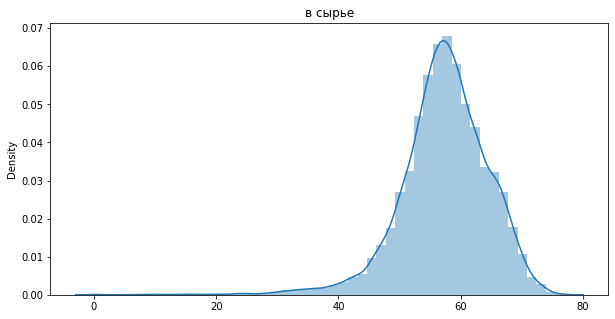

In [20]:
show_sum_concentrate(first, "в сырье")

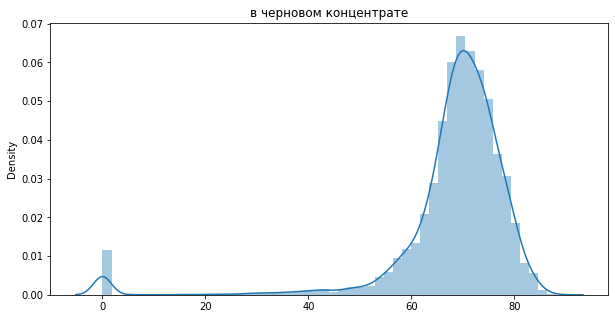

In [21]:
show_sum_concentrate(second, "в черновом концентрате")

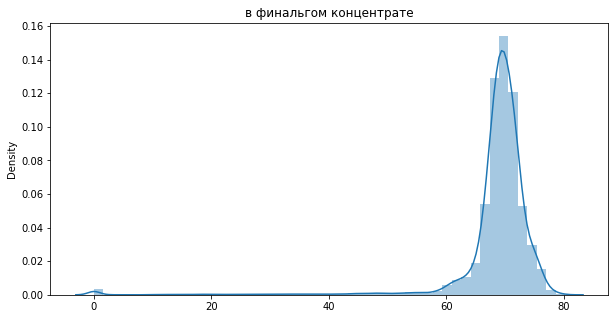

In [22]:
show_sum_concentrate(third, "в финальгом концентрате")

 Видим некоторое количество наблюдений, где суммарная концентрация всех веществ около нуля, что невозможно ни на каком из этапов. Такие данные негативно скажутся на нашей модели. Удалим эти наблюдения из всех выборок как аномальные.
 
 В целом же видим, что разброс значений суммарной концентрации веществ уменьшается с каждым этапом.

In [23]:
first = first[first > 1]
second = second[second > 1]
third = third[third > 1]
df_full = df_full.loc[first.index & second.index & third.index]
df_full.shape

(18943, 86)

In [24]:
df_train = df_train.loc[df_full.index & df_train.index]
df_test = df_test.loc[df_full.index & df_test.index]
print(df_train.shape)
print(df_test.shape)

(13789, 52)
(5154, 52)


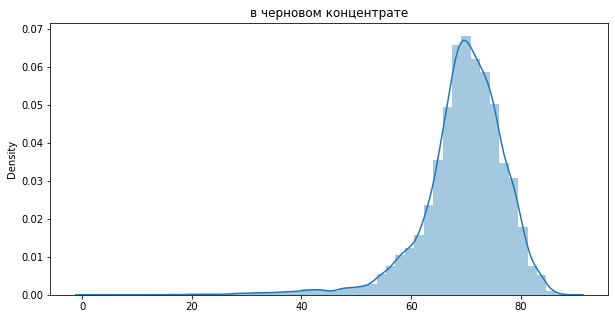

In [25]:
# проверим, что аномалии исчезли для 2 этапа
second = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + \
            df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
show_sum_concentrate(second, "в черновом концентрате")

### Вывод
- концентрация золота увеличивается с каждым этапом, а серебра — падает
- удостоверились, что размеры гранул примерно одинаково распределены в тестовой и обучающей выборках
- обнаружили и удалили аномальные значения суммарной концентрации веществ, которые равны нулю

## Модель

### Функция для вычисления итоговой sMAPE.

In [26]:
def smape(target, predict): 
    return ((1/len(target)) * sum(2 * abs(target - predict) / (abs(target) + abs(predict)))) * 100

def smape_final(rougher, final):
    return (0.25 * rougher + 0.75 * final)

### Обучение разных моделей и оценка их качества кросс-валидацией.

Подготовим выборки и целевые признаки для нашей модели.

In [27]:
target_train_r = train.loc[df_train.index & train.index]['rougher.output.recovery'].reset_index(drop=True)
target_train_f = train.loc[df_train.index & train.index]['final.output.recovery'].reset_index(drop=True)
target_test_r = full.loc[df_test.index & full.index]['rougher.output.recovery'].reset_index(drop=True)
target_test_f = full.loc[df_test.index & full.index]['final.output.recovery'].reset_index(drop=True)

In [28]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
features_train = df_train
features_test = df_test
print(features_train.shape)
print(features_test.shape)
print(target_train_r.shape)
print(target_train_f.shape)
print(target_test_r.shape)
print(target_test_f.shape)

(13789, 52)
(5154, 52)
(13789,)
(13789,)
(5154,)
(5154,)


In [29]:
smape_score = make_scorer(smape, greater_is_better=False)

Масштабируем признаки и проверим на них модель линейной регрессии, а ее качество проверим кросс-валидацией.

In [30]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)
model = LinearRegression()
scores_r = cross_val_score(model, features_train_scaled, target_train_r, 
                           scoring=smape_score, cv=5).mean() * -1
scores_f = cross_val_score(model, features_train_scaled, target_train_f, 
                           scoring=smape_score, cv=5).mean() * -1
final_score = smape_final(scores_r, scores_f)
print('SMAPE rougher: {:.2f}%'.format(scores_r.mean()))
print('SMAPE final: {:.2f}%'.format(scores_f.mean()))
print('Итоговое SMAPE: {:.2f}%'.format(final_score))

SMAPE rougher: 7.21%
SMAPE final: 10.94%
Итоговое SMAPE: 10.01%


In [31]:
# GridSearchCV очень долго работает на платформе, поэтому предварительно подобрав параметры,
# сразу обучаю на оптимальных, а 2 ячейки закоментил

#model = RandomForestRegressor(random_state=12345)
#parametrs = {'n_estimators': range (1,151,25), "max_depth" : range (0, 11, 5)}
#grid = GridSearchCV(model, parametrs,scoring=smape_score, cv=3, verbose=2, n_jobs=-1)
#grid.fit(features_train_scaled, target_train_r)
#print(grid.best_params_)
#print('SMAPE rougher: {:.2f} %'.format(grid.best_score_))
#print(grid.best_score_)

In [32]:
#model = RandomForestRegressor(random_state=12345)
#parametrs = {'n_estimators': range (1,151,25), "max_depth" : range (0, 11, 5)}
#grid = GridSearchCV(model, parametrs,scoring=smape_score, cv=3, verbose=2, n_jobs=-1)
#grid.fit(features_train_scaled, target_train_f)
#print(grid.best_params_)
#print('SMAPE final {:.2f} %'.format(grid.best_score_))
#print(grid.best_score_)

Проверим модель обученную случайным лесом.

In [33]:
model_r = RandomForestRegressor(random_state=12345, n_estimators=100, max_depth = 10)
model_f = RandomForestRegressor(random_state=12345, n_estimators=1, max_depth = 5)
model_r.fit(features_train_scaled, target_train_r)
model_f.fit(features_train_scaled, target_train_f)
scores_r = cross_val_score(model_r, features_train_scaled, target_train_r, 
                           scoring=smape_score, cv=5).mean() * -1
scores_f = cross_val_score(model_f, features_train_scaled, target_train_f, 
                           scoring=smape_score, cv=5).mean() * -1
final_score = smape_final(scores_r, scores_f)
print('SMAPE rougher: {:.2f}%'.format(scores_r.mean()))
print('SMAPE final: {:.2f}%'.format(scores_f.mean()))
print('Итоговое SMAPE: {:.2f}%'.format(final_score))

SMAPE rougher: 7.15%
SMAPE final: 10.46%
Итоговое SMAPE: 9.64%


Качество модели случайного леса оказалось выше, чем у модели линейной регрессии. Проверим ее на тестовой выборке.

In [34]:
predictions_r = model_r.predict(features_test_scaled)
predictions_f = model_f.predict(features_test_scaled)

scores_r = smape(target_test_r, predictions_r)
scores_f = smape(target_test_f, predictions_f)
final_score = smape_final(scores_r, scores_f)

print('SMAPE rougher: {:.2f}%'.format(scores_r))
print('SMAPE final: {:.2f}%'.format(scores_f))
print('Итоговое SMAPE: {:.2f}%'.format(final_score))

SMAPE rougher: 4.42%
SMAPE final: 8.55%
Итоговое SMAPE: 7.52%


Проверим на адекватность показатели нашей модели сранив их с SMAPE для константной модели.

In [35]:
dummy_r = DummyRegressor(strategy='mean')
dummy_f = DummyRegressor(strategy='mean')
dummy_r.fit(features_train_scaled, target_train_r)
dummy_f.fit(features_train_scaled, target_train_f)
dummy_predictions_r = dummy_r.predict(features_test_scaled)
dummy_predictions_f = dummy_f.predict(features_test_scaled)

scores_r = smape(target_test_r, dummy_predictions_r)
scores_f = smape(target_test_f, dummy_predictions_f)
final_score = smape_final(scores_r, scores_f)

print('SMAPE rougher контстантной модели: {:.2f}%'.format(scores_r))
print('SMAPE final контстантной модели: {:.2f}%'.format(scores_f))
print('Итоговое SMAPE контстантной модели: {:.2f}%'.format(final_score))

SMAPE rougher контстантной модели: 5.38%
SMAPE final контстантной модели: 8.57%
Итоговое SMAPE контстантной модели: 7.77%


### Вывод
Модель обученная случайным лесом оказалась лучшей. Ее показатель качества SMAPE:
- эффективности обогащения чернового концентрата: 4.42% 
- эффективности обогащения финального концентрата: 8.55%
- итоговый показатель: 7.52%

Данные показатели адекватные, что подтверждается сравнением с показателями константной модели (7.77%).

## Общий вывод

Полученные данные были обработаны: 
- заполнены пропуски
- обнаружены и удалены наблюдения с нулевыми значениями суммарной концентрации веществ
- проведена проверка расчета эффективности обогащения

Проведен анализ изменения концентрации металлов. На каждом технологическом этапе концентрация золота увеличивается, а серебра уменьшается.

Подготовив данные для обучения моделей, было проведено сравнение алгоритмов случайного леса и линейной регрессии. Оценив их качество кросс-валидацией, лучшей оказалась модель на алгоритме случайного леса. На тестовой выборке модель показала итоговый результат SMAPE = 7.52%, что лучше показателя на константной модели (7.77%), следовательно модель адекватная и рекомедована для дальнейшего приминения.
